In [2]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')
import sys
# Change the path below to the path where your folder locates
sys.path.append('/content/gdrive/My Drive/cm146-2023-homeworks/PS2')

Mounted at /content/gdrive


In [3]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

#time
import time

In [4]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [5]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        matrix = np.ones([n,1])
        #X = np.append(matrix,X,1)
        # part g: modify to create matrix for polynomial model
      
        m = self.m_
        for i in range (1,m+1):
          matrix = np.append(matrix,np.power(X,i),1)

        Phi = matrix
        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=0.01,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/1+t # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            weight_vec = np.array(list(self.coef_))

            for i, val in enumerate(self.coef_):
              summation = 0
              for j, x in enumerate(X):
                summation += (np.dot(weight_vec, x)- y[j]) * x[i] # [h_theta(x_n)-y_n]*x_nj
              self.coef_[i] += -2 * eta * summation # -2*
           
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X,np.transpose(self.coef_)) # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d'%(t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
                
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution

        self.coef_ = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)),np.transpose(X)),y)
        
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X,np.transpose(self.coef_))
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = 0

        h_theta = self.predict(X)
        for i,j in enumerate(h_theta):
          cost+= np.power((h_theta[i] -y[i]),2)
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.power(self.cost(X,y)/len(X),0.5)
        print(error)
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

In [16]:
def likelihood(theta,X,n):
  return theta**X.sum() * (1-theta)**(n-X.sum())

  


Part A:
Visualizing data...
Train Data:


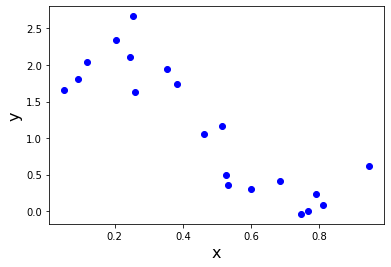

Test Data:


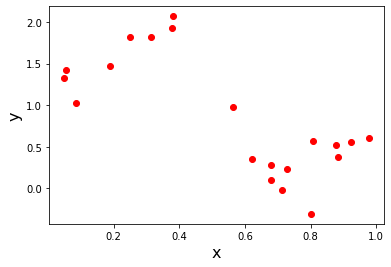

Investigating linear regression...
part D: Gradient Descent

number of iterations: 10000
eta: 0.0001	coefficients:[ 2.27044798 -2.46064834]	cost:4.086397036795765
number of iterations: 7020
eta: 0.001	coefficients:[ 2.4464068 -2.816353 ]	cost:3.9125764057919463
number of iterations: 764
eta: 0.01	coefficients:[ 2.44640703 -2.81635346]	cost:3.9125764057914862


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-5-1cad4500f4ca>:108: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
<ipython-input-5-1cad4500f4ca>:112: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
<ipython-input-5-1cad4500f4ca>:102: RuntimeWarning: overflow encountered in double_scalars
  summation += (np.dot(weight_vec, x)- y[j]) * x[i] # [h_theta(x_n)-y_n]*x_nj
<ipython-input-5-1cad4500f4ca>:103: RuntimeWarning: invalid value encountered in double_scalars
  self.coef_[i] += -2 * eta * summation # -2*


number of iterations: 10000
eta: 0.1	coefficients:[nan nan]	cost:nan
part E:
	coefficients:[ 2.44640709 -2.81635359] model_fit closed form runtime:0.0012276172637939453
number of iterations: 764
	coefficients:[ 2.44640703 -2.81635346] model_fit_GD runtime:0.07941532135009766
Investigating polynomial regression...
0
0.8570606234439588
0.7472683641851717
1
0.4422994690134425
0.5935949636028289
2
0.441314965682919
0.5957110445316881
3
0.24426921898418788
0.37194297617203903
4
0.22968276125805598
0.3639317200218455
5
0.22681133051783178
0.3551377428803351
6
0.22445294828005166
0.36745016928700935
7
0.22228193952066946
0.42500831457079924
8
0.2222605749595839
0.40566865244399714
9
0.21177880295682425
1.482441015631645
10
0.2116891695188377
2.0078547606705337


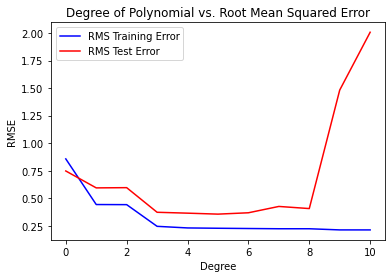

Question 3 part C: first plot n = 10 X = {0,0.01...1.0}
Done!


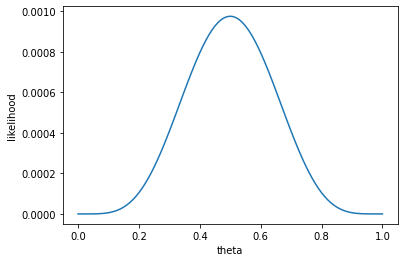

In [25]:
######################################################################
# main
######################################################################

def main() :
    # load data
    # Use the abs path on your own Google Drive
    train_data = load_data('/content/gdrive/My Drive/cm146-2023-homeworks/PS2/regression_train.csv')
    test_data = load_data('/content/gdrive/My Drive/cm146-2023-homeworks/PS2/regression_test.csv')


    X_train = train_data.X;
    y_train = train_data.y;

    X_test = test_data.X;
    y_test = test_data.y;

    # print(train_data.X.shape, train_data.y.shape)
    # print(test_data.X.shape, test_data.y.shape)
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print("Part A:")
    print('Visualizing data...')
    print("Train Data:")
    plot_data(X_train,y_train);
    print("Test Data:")
    plot_data(X_test,y_test,color = 'r');
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')

    print("part D: Gradient Descent\n")
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    model.cost(X_train,y_train)
    

    
    eta_list =[pow(10,-4),pow(10,-3),pow(10,-2),pow(10,-1)]

    for eta_i in eta_list:
      model.fit_GD(X_train,y_train,eta = eta_i)
      cost = model.cost(X_train,y_train)
      print(f"eta: {eta_i}\tcoefficients:{model.coef_}\tcost:{cost}")


    print("part E:")
    start = time.time()
    model.fit(X_train,y_train)
    stop = time.time()
    runtime = stop - start
    print(f'\tcoefficients:{model.coef_} model_fit closed form runtime:{runtime}')

    start = time.time()
    model.fit_GD(X_train,y_train)
    stop = time.time()
    runtime = stop - start
    print(f'\tcoefficients:{model.coef_} model_fit_GD runtime:{runtime}')




    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')
    train_rmse_error = []
    test_rmse_error = []
    x_index = np.arange(11)
    for m_feature in range(11):
      model = PolynomialRegression(m = m_feature)
      model.fit(X_train,y_train)
      print(m_feature)
      train_rmse_error.append(model.rms_error(X_train,y_train))
      test_rmse_error.append(model.rms_error(X_test,y_test))


    plt.plot(x_index,train_rmse_error,color = "blue",label="RMS Training Error")
    plt.plot(x_index,test_rmse_error,color = "red",label="RMS Test Error")
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.title("Degree of Polynomial vs. Root Mean Squared Error")
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ###
    
    print("Question 3 part C: first plot n = 10 X = {0,0.01...1.0}")
    thetas = np.linspace(0,1,101)
    # X = np.array([1]*6 + [0]*4)
    # likelihoods = [likelihood(theta,X,n=10) for theta in thetas]
    # plt.plot(thetas,likelihoods)
    # plt.xlabel('theta')
    # plt.ylabel('likelihood')
    # plt.show    
    # X = np.array([1]*3 + [0]*2)
    # likelihoods = [likelihood(theta,X,n=5) for theta in thetas]
    # plt.plot(thetas,likelihoods)
    # plt.xlabel('theta')
    # plt.ylabel('likelihood')
    # plt.show    

    # X = np.array([1]*60 + [0]*40)
    # likelihoods = [likelihood(theta,X,n=100) for theta in thetas]
    # plt.plot(thetas,likelihoods)
    # plt.xlabel('theta')
    # plt.ylabel('likelihood')
    # plt.show    
    X = np.array([1]*5 + [0]*5)
    likelihoods = [likelihood(theta,X,n=10) for theta in thetas]
    plt.plot(thetas,likelihoods)
    plt.xlabel('theta')
    plt.ylabel('likelihood')
    plt.show    
    print("Done!")

if __name__ == "__main__":
    main()
